# Big Data avec les Jeux Olympiques

Vous trouverez deux fichiers: `athlete_events.csv` et `noc_regions.csv`. Nous nous proposons de travailler sur ces données afin d'en extraire des informations utiles !

## Lire un fichier csv

On rappelle que le format [csv](https://fr.wikipedia.org/wiki/Comma-separated_values) (**c**omma **s**eparated **v**alues) est un format de fichier texte (donc lisible à la fois par une machine et un humain) ouvert (les spécifications sont parfaitement documentées, il n'y a pas de fonctionnalités secrètes) qui permet de transmettre des données en table.

On peut lire et créer un fichier au format csv à l'aide d'un tableur (Libreoffice Calc ou bien Microsoft Excel par exemple), mais aussi à l'aide du module `csv` de python. La [documentation standard](https://docs.python.org/fr/3.8/library/csv.html) donne toutes les informations nécessaires.

In [1]:
import csv

with open("athlete_events.csv") as fichier:
    lecteur_csv = csv.DictReader(fichier)
    data = [enregistrement for enregistrement in lecteur_csv]

print("Le fichier 'athlete_events.csv' contient {} enregistrements".format(len(data)))
print("Exemple (premier enregistrement):")
print(data[0])

Le fichier 'athlete_events.csv' contient 271116 enregistrements
Exemple (premier enregistrement):
{'ID': '1', 'Name': 'A Dijiang', 'Sex': 'M', 'Age': '24', 'Height': '180', 'Weight': '80', 'Team': 'China', 'NOC': 'CHN', 'Games': '1992 Summer', 'Year': '1992', 'Season': 'Summer', 'City': 'Barcelona', 'Sport': 'Basketball', 'Event': "Basketball Men's Basketball", 'Medal': 'NA'}


Comme on peut le constater, ce fichier est **énorme**. L'objectif de ce document est de vous faire manipuler ces données pour en extraire des informations intéressantes, puis les présenter de manière adéquate (notamment par des graphiques).

## Inclusion des code de pays (NOC)

Les valeurs dont la clé est `"NOC"` sont des codes pays sur 3 chiffres. S'il est évident que `CHN` fait référence à la chine, c'est moins évident pour d'autres. 

Le fichier `noc_regions.csv` est justement là pour nous donner ces informations essentielles:

In [2]:
with open("noc_regions.csv") as fichier:
    lecteur_csv = csv.DictReader(fichier)
    nocs = [enregistrement for enregistrement in lecteur_csv]

print("Le fichier 'noc_regions.csv' contient {} enregistrements".format(len(nocs)))
print("Exemple (premier enregistrement):")
print(nocs[0])

Le fichier 'noc_regions.csv' contient 230 enregistrements
Exemple (premier enregistrement):
{'NOC': 'AFG', 'region': 'Afghanistan', 'notes': ''}


---
## Exercice 1: Fusion des deux tables

Votre première tâche consiste à incorporer les données du tableau `nocs` dans le tableau `data`. Concrètement, il s'agit de rajouter une clé `"region"` pour chaque enregistrement du tableau `data`, en se servant de l'entrée `"NOC"` pour déterminer la bonne région. On ignorera les notes qui n'existent pas toujours et dont nous n'aurons pas besoin.

Par exemple, pour le premier enregistrement `data[0]`, comme on a `data[0]["NOC"] == 'CHN'`, il faut rajouter la région correspondante: `data[0]["region"] = 'China'`.

**Difficulté:** Il va falloir trouver lequel des enregistrements du tableau `nocs`correspond à la clé `'CHN'`.

In [3]:
for i in range(len(nocs)):
    if nocs[i]["NOC"] == 'CHN':
        print("nocs[{}] == {}".format(i, nocs[i]))

nocs[41] == {'NOC': 'CHN', 'region': 'China', 'notes': ''}


Pour toute la suite de ce TP, on travaillera avec le tableau `data` augmenté des informations sur les régions.

## Afficher divers types de graphiques

Le meilleur moyen pour trouver comment tracer le graphique de ses rêves (adapté à la question posée) est d'aller observer la [gallerie d'exemples avec code source](https://matplotlib.org/gallery/index.html) sur le site officiel de matplotlib.

In [4]:
from matplotlib import pyplot as plt

### Affichage d'une ou plusieurs courbes

Pour afficher une courbe, il faut fournir en paramètre un tableau contenant toutes les abscisses des points à représenter, ainsi qu'un autre tableau contenant toutes les ordonnées. Par exemple, représentons les fonctions $f_1: x\longmapsto 1 + \frac{1-x^2}{1+x^2}$ et $f_2: x\longmapsto \sin(x)$.

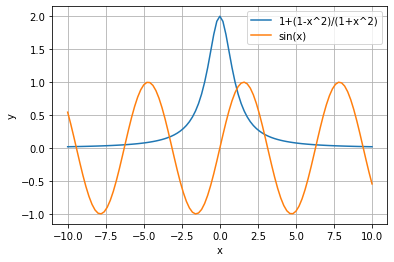

In [5]:
from math import sin

# On veut que les abscisses s'étalent entre -10 et 10, par pas de 0.5
xs = [] # abscisses
y1s = [] # ordonnées pour f_1
y2s = [] # ordonnées pour f_2

x = -10.0
while x <= 10.0:
    xs.append(x)
    y1s.append(1 + (1-x**2)/(1+x**2))
    y2s.append(sin(x))
    
    x += 0.2
    
plt.plot(xs, y1s, label="1+(1-x^2)/(1+x^2)")
plt.plot(xs, y2s, label="sin(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


### Nuages de points (scatterplot)

Un nuage de points sert notamment à représenter sur un même graphique deux quantités plus ou moins reliées (le but étant de chercher une éventuelle relation entre les deux, lorsque l'on observe par exemple un alignement des points).

L'exemple ci-dessous est tiré de l'excellent livre [Data science from scratch](https://www.oreilly.com/library/view/data-science-from/9781492041122/).

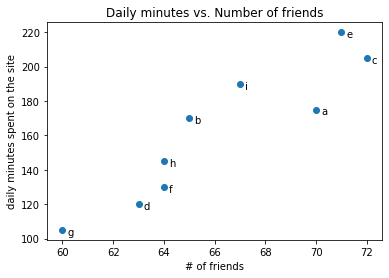

In [6]:
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]

plt.scatter(friends, minutes)
for i in range(len(friends)):
    label = labels[i]
    friend_count = friends[i]
    minute_count = minutes[i]
    
    plt.annotate(label,
                xy=(friend_count, minute_count),
                xytext=(5, -5), # label 5 pixels à droite, 5 en-dessous
                textcoords='offset points') # label décallé par rapport au point

plt.title('Daily minutes vs. Number of friends')
plt.xlabel('# of friends')
plt.ylabel('daily minutes spent on the site')
plt.show()

### Diagramme à barres

En guise d'exemple, on va procéder à la simulation statistique suivante: on jette 4 dés à 6 faces et on ajoute les points obtenus. On simule ce lancer 100000 fois et on représente à l'aide un diagramme à barre les effectifs des totaux obtenus (qui s'échelonnent entre $1+1+1+1=4$ et $6+6+6+6=24$).

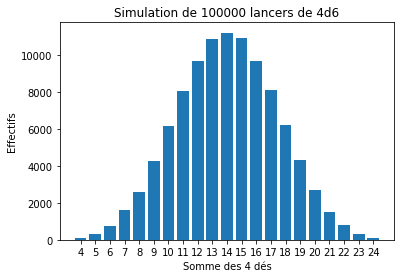

In [7]:
N = 100000
from random import randint

dico_effectifs = {}

# On initialise tous les effectifs à 0
for i in range(4, 25):
    dico_effectifs[i] = 0
    
for _ in range(N):
    d1 = randint(1, 6)
    d2 = randint(1, 6)
    d3 = randint(1, 6)
    d4 = randint(1,6)
    somme = d1 + d2 + d3 + d4
    
    #
    # Attention: il n'est pas du tout équivalent d'écrire 
    # somme = randint(4, 24). Pour vous en convaincre,
    # visualisez la différence !
    #
        
    dico_effectifs[somme] += 1
    
# On crée à présent 2 tableaux pour matplotlib: un contenant
# tous les effectifs, l'autre les labels correspondants.

effectifs = []
labels = []
for i in range(4, 25):
    effectifs.append(dico_effectifs[i])
    labels.append(str(i))
    
plt.bar(range(len(effectifs)), effectifs)
plt.xticks(range(len(effectifs)), labels)
plt.title("Simulation de {} lancers de 4d6".format(N))
plt.xlabel("Somme des 4 dés")
plt.ylabel("Effectifs")
plt.show()

### Boîtes à moustaches (Diagrammes de Tucker)

Le type de diagramme communément appelé [boîtes à moustaches](https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches) permet de résumer toutes une série de mesure, en affichant simplement les différents quartiles.


**Exemple:** On lance 100 pièces de monnaies, et on compte le nombre de piles obtenu. On simule 250 fois cette expérience, et on affiche le diagramme en boîte à moustaches obtenu.

Afin d'observer le phénomène de fluctuation d'échantillonnage, on répète la simulation complète 10 fois, ce qui donnera donc 10 diagrammes en boîtes à moustaches.

Remarquons que la librairie matplotlib calcule d'elle-même les données utiles pour le diagramme (médiane, quartiles, etc).

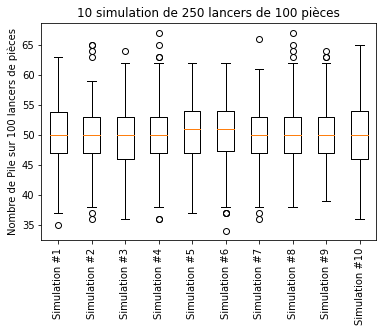

In [8]:
from matplotlib import pyplot as plt

N = 10 # Nombre de simulations
L = 250 # Nombre de lancers pour une simulation
P = 100 # Nombre de pièces lancées

simulations = []

for i in range(N):
    sommes = []
    for _ in range(L):
        s = 0
        for _ in range(P):
            s += randint(0, 1)
        sommes.append(s)
        
    simulations.append(sommes)
    
plt.boxplot(simulations)
plt.title("{} simulation de {} lancers de {} pièces".format(N, L, P))
plt.ylabel("Nombre de Pile sur {} lancers de pièces".format(P))
plt.xticks([i+1 for i in range(N)], ["Simulation #{}".format(i+1) for i in range(N)], rotation=90)
plt.show()

Comment interpréter ce diagramme:
* Le trait rouge au milieu représente la médiane (proche de 50 pour chaque simulation, ce qui n'est guère étonnant).
* Les parties supérieures et inférieures du rectangle représentent respectivement $Q_3$ et $Q_1$, les troisièmes et premiers quartiles.

  Le rectangle correspond donc à l'intervalle interquartile (qui contient théoriquement environ 50% des mesures), et la hauteur de ce rectangle l'écart interquartile $Q_3 - Q_1$;
* Les traits horizontaux au bout des moustaches sont placé à $1,5\times (Q_3-Q_1)$, c'est-à-dire 1,5 fois l'écart interquartile. Les quelques valeurs représentées au-dessus ou en-dessous (lorsqu'il y en a) sont considérées comme des mesures exceptionnelles. 

  Théoriquement, on peut montrer que les extrémités des moustaches sont proches du 1er et du 99ème centiles (il ne reste donc que 1% des mesures au-dessus et en-dessous, celles-ci étant représentées directement par les petits cercles).

---
## Exercice 2

Visualisez l'évolution du nombre de médailles obtenues par les femmes au cours des années.

**Indications:**

Il va falloir filtrer les données:
* On ne garde que les femmes qui ont obtenu une médaille
* On compte ensuite les effectifs par années
* On affiche le résultat à l'aide par exemple d'un diagramme à barres (adapté à un affichage d'effectifs) pour chaque année où des femmes ont obtenu au moins une médaille.

In [9]:
# Écrivez votre script ici



---
## Exercice 3
Affichez le diagramme des 5 pays ayant remporté le plus grand nombre de médailles, toutes époques confondues.

**Indications:**

Il faudra ici:
* Compter le nombre de médailles obtenus par chaque pays. Placer les résultats dans un tableau ou encore mieux, un dictionnaire.
* Trier ce dictionnaire par ordre décroissant du nombre de médailles (c'est là qu'intervient la fonction de tri fusion élaborée en fin de TP 7, avec les paramètres optionnels `croissant` et `clé_de_comparaison`).
* Ne garder que les 5 premières entrées, et les représenter ensuite à l'aide d'un diagramme à barres.

In [10]:
# Écrivez votre script ici



---
## Exercice 4
Faites de même pour les médailles d'or.

In [11]:
# Écrivez votre script ici



---
## Exercice 5
Visualisez les 5 disciplines ramenant le plus de médailles d'or pour la France.

**Indications:** Inspirez-vous des exercices précédents.

In [12]:
# Écrivez votre script ici



---
## Exercice 6
Cherchez une éventuelle corrélation entre le poids et la taille des médaillés d'or, à l'aide d'un graphique adéquat (**squatterplot**)

**Indications:**

On demande ici de tracer un nuage de points montrant le poids des athlètes selon un des axes, et la taille sur l'autre, mais uniquement pour ceux ayant eu une médaille d'or.

On observera la présence d'une corrélation si le nuage de points est relativement aligné (cela signifiera alors qu'il y a quasiment une relation affine entre la taille et le poids).

In [13]:
# Écrivez votre script ici



---
## Exercice 7
Visualisez l'évolution des âges des athlètes au cours des années (à l'aide de **boxplot**)

**Indications:**

On utilisera un diagramme en boîte à moustaches pour chaque année.

In [14]:
# Écrivez votre script ici



---
## Exercice 8
Faire de même pour le poids des athlètes, ainsi que leur taille. Différenciez selon le sexe.

**Indications:**

Cela fait donc 4 diagrammes à afficher (poids/tailles des femmes et des hommes).

In [15]:
# Écrivez votre script ici



---
## Exercice 9
Refaites cette étude uniquement pour le poids des altérophiles.

In [16]:
# Écrivez votre script ici

